In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Datasets

In [5]:
Stats = pd.read_csv('../Player Data/player_data_non_null.csv')
Stats

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
0,1,Nicholas Abruzzese,23.0,TOR,C,2,0,2,2,1,...,2,0.0,18,539,0.0,1,0.0,0.0,0.0,2023
1,2,Noel Acciari,31.0,TOT,C,77,14,9,23,-4,...,102,13.7,1102,859,81.0,244,337.0,289.0,53.8,2023
2,3,Calen Addison,22.0,MIN,D,62,3,26,29,-17,...,77,3.9,999,967,38.0,19,0.0,0.0,0.0,2023
3,4,Egor Afanasyev,22.0,NSH,W,17,1,0,1,-7,...,21,4.8,184,651,13.0,23,0.0,0.0,0.0,2023
4,5,Andrew Agozzino,32.0,SJS,W,4,1,2,3,-1,...,9,11.1,65,982,4.0,12,1.0,0.0,100.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12594,875,Greg Zanon,29.0,MIN,D,81,2,13,15,-10,...,59,3.4,1812,1342,196.0,183,0.0,1.0,0.0,2010
12595,876,Henrik Zetterberg,29.0,DET,C,74,23,47,70,12,...,309,7.4,1485,1204,34.0,44,536.0,543.0,49.7,2010
12596,877,Vladimir Zharkov,22.0,NJD,W,40,0,10,10,2,...,54,0.0,458,686,6.0,22,1.0,3.0,25.0,2010
12597,878,Marek Židlický,32.0,MIN,D,78,6,37,43,-16,...,116,5.2,1885,1450,128.0,80,0.0,0.0,0.0,2010


In [6]:
Contracts = pd.read_csv('../Contract Data/contract_data_non_null.csv')
Contracts

,Name,Age,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
0,Alex Stalock,35,G,ANA,35+ (UFA),0,1,800000,800000,2023,8
1,Troy Terry,25,RW,ANA,Stnd (RFA),0,7,49000000,7000000,2023,8
2,Robert Hägg,28,LD,ANA,Stnd (UFA),0,1,775000,775000,2023,7
3,Radko Gudas,33,RD,ANA,Stnd (UFA),0,3,12000000,4000000,2023,7
4,Alex Killorn,33,"RW, LW",ANA,Stnd (UFA),0,4,25000000,6250000,2023,7
...,...,...,...,...,...,...,...,...,...,...,...
3633,Jim Slater,29,C,WPG,Stnd (UFA),1,3,4800000,1600000,2012,6
3634,Zach Bogosian,21,RD,WPG,Stnd (RFA),0,2,5000000,2500000,2011,9
3635,Kyle Wellwood,28,C,WPG,Stnd (UFA),0,1,700000,700000,2011,9
3636,Blake Wheeler,24,"RW, C",WPG,Stnd (RFA),0,2,5100000,2550000,2011,7


# Joins

Since Contracts contains a primary key of [`Name`, `Year`, `Month`] we will left_join Stats onto Contracts

In [7]:
df = pd.merge(Contracts, Stats, how='inner', left_on=['Name', 'Year'], right_on=['Player', 'year'])
df

,Name,Age_x,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
0,Troy Terry,25,RW,ANA,Stnd (RFA),0,7,49000000,7000000,2023,...,188,12.2,1356,1162,23.0,12,2.0,0.0,100.0,2023
1,Robert Hägg,28,LD,ANA,Stnd (UFA),0,1,775000,775000,2023,...,40,5.0,590,931,47.0,111,0.0,0.0,0.0,2023
2,Radko Gudas,33,RD,ANA,Stnd (UFA),0,3,12000000,4000000,2023,...,110,1.8,1250,1042,124.0,312,0.0,0.0,0.0,2023
3,Alex Killorn,33,"RW, LW",ANA,Stnd (UFA),0,4,25000000,6250000,2023,...,143,18.9,1411,1033,31.0,61,1.0,1.0,50.0,2023
4,Nathan Beaulieu,29,LD/RD,ANA,Stnd (UFA),0,1,850000,850000,2022,...,24,0.0,258,646,19.0,19,0.0,0.0,0.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,Jim Slater,29,C,WPG,Stnd (UFA),1,3,4800000,1600000,2012,...,118,11.0,1152,886,73.0,163,634.0,531.0,54.4,2012
2852,Zach Bogosian,21,RD,WPG,Stnd (RFA),0,2,5000000,2500000,2011,...,155,3.2,1591,1344,89.0,111,0.0,0.0,0.0,2011
2853,Kyle Wellwood,28,C,WPG,Stnd (UFA),0,1,700000,700000,2011,...,50,10.0,479,821,7.0,8,65.0,67.0,49.2,2011
2854,Blake Wheeler,24,"RW, C",WPG,Stnd (RFA),0,2,5100000,2550000,2011,...,179,10.1,1316,975,47.0,74,52.0,96.0,35.1,2011


In [8]:
df['Name'].nunique()

1298

In [9]:
df.groupby(['Name', 'year']).size().sort_values(ascending=False)

Name               year
Zach Bogosian      2020    2
Evander Kane       2022    2
Cody Franson       2013    2
Eric Fehr          2013    2
Trevor Lewis       2021    2
                          ..
Frank Corrado      2016    1
Frank Vatrano      2018    1
                   2019    1
                   2022    1
Zemgus Girgensons  2023    1
Length: 2843, dtype: int64

In [10]:
df[df['Name'] == 'Ben Hutton'][['Name', 'Month', 'year']]

,Name,Month,year
17,Ben Hutton,1,2021
18,Ben Hutton,10,2021
1240,Ben Hutton,9,2019
2582,Ben Hutton,11,2016
2636,Ben Hutton,3,2022


In [11]:
df.groupby(['Name', 'year', 'Month']).size().sort_values(ascending=False)

Name               year  Month
Aaron Ekblad       2016  7        1
Mike Ribeiro       2013  7        1
Mike Cammalleri    2014  7        1
                   2017  7        1
Mike Commodore     2011  7        1
                                 ..
Francis Bouillon   2010  6        1
                   2012  7        1
                   2013  3        1
Frank Corrado      2016  7        1
Zemgus Girgensons  2023  6        1
Length: 2856, dtype: int64

In [12]:
Contracts[Contracts['Name'] == 'Troy Terry']

,Name,Age,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
1,Troy Terry,25,RW,ANA,Stnd (RFA),0,7,49000000,7000000,2023,8
27,Troy Terry,22,RW,ANA,Stnd (RFA),1,3,4350000,1450000,2020,7


Our primary key remains intact

In [13]:
df

,Name,Age_x,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
0,Troy Terry,25,RW,ANA,Stnd (RFA),0,7,49000000,7000000,2023,...,188,12.2,1356,1162,23.0,12,2.0,0.0,100.0,2023
1,Robert Hägg,28,LD,ANA,Stnd (UFA),0,1,775000,775000,2023,...,40,5.0,590,931,47.0,111,0.0,0.0,0.0,2023
2,Radko Gudas,33,RD,ANA,Stnd (UFA),0,3,12000000,4000000,2023,...,110,1.8,1250,1042,124.0,312,0.0,0.0,0.0,2023
3,Alex Killorn,33,"RW, LW",ANA,Stnd (UFA),0,4,25000000,6250000,2023,...,143,18.9,1411,1033,31.0,61,1.0,1.0,50.0,2023
4,Nathan Beaulieu,29,LD/RD,ANA,Stnd (UFA),0,1,850000,850000,2022,...,24,0.0,258,646,19.0,19,0.0,0.0,0.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,Jim Slater,29,C,WPG,Stnd (UFA),1,3,4800000,1600000,2012,...,118,11.0,1152,886,73.0,163,634.0,531.0,54.4,2012
2852,Zach Bogosian,21,RD,WPG,Stnd (RFA),0,2,5000000,2500000,2011,...,155,3.2,1591,1344,89.0,111,0.0,0.0,0.0,2011
2853,Kyle Wellwood,28,C,WPG,Stnd (UFA),0,1,700000,700000,2011,...,50,10.0,479,821,7.0,8,65.0,67.0,49.2,2011
2854,Blake Wheeler,24,"RW, C",WPG,Stnd (RFA),0,2,5100000,2550000,2011,...,179,10.1,1316,975,47.0,74,52.0,96.0,35.1,2011


## Investigate Age

In [14]:
df[['Age_x', 'Age_y']]

,Age_x,Age_y
0,25,25.0
1,28,27.0
2,33,32.0
3,33,33.0
4,29,29.0
...,...,...
2851,29,29.0
2852,21,20.0
2853,28,27.0
2854,24,24.0


We see some discrepencies

In [15]:
df[['Name', 'Age_x', 'Age_y', 'Team', 'Total Value', 'AAV', 'Month', 'Year']]

,Name,Age_x,Age_y,Team,Total Value,AAV,Month,Year
0,Troy Terry,25,25.0,ANA,49000000,7000000,8,2023
1,Robert Hägg,28,27.0,ANA,775000,775000,7,2023
2,Radko Gudas,33,32.0,ANA,12000000,4000000,7,2023
3,Alex Killorn,33,33.0,ANA,25000000,6250000,7,2023
4,Nathan Beaulieu,29,29.0,ANA,850000,850000,10,2022
...,...,...,...,...,...,...,...,...
2851,Jim Slater,29,29.0,WPG,4800000,1600000,6,2012
2852,Zach Bogosian,21,20.0,WPG,5000000,2500000,9,2011
2853,Kyle Wellwood,28,27.0,WPG,700000,700000,9,2011
2854,Blake Wheeler,24,24.0,WPG,5100000,2550000,7,2011


In [16]:
df[df['Age_x'] != df['Age_y']]

,Name,Age_x,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
1,Robert Hägg,28,LD,ANA,Stnd (UFA),0,1,775000,775000,2023,...,40,5.0,590,931,47.0,111,0.0,0.0,0.0,2023
2,Radko Gudas,33,RD,ANA,Stnd (UFA),0,3,12000000,4000000,2023,...,110,1.8,1250,1042,124.0,312,0.0,0.0,0.0,2023
8,Glenn Gawdin,25,"C, RW",ANA,Stnd (UFA),0,2,1525000,762500,2022,...,3,0.0,18,555,1.0,1,3.0,8.0,27.3,2022
9,Frank Vatrano,28,"LW, RW",ANA,Stnd (UFA),0,3,10950000,3650000,2022,...,161,11.2,934,790,26.0,68,12.0,13.0,48.0,2022
11,Sam Carrick,30,"RW, C",ANA,Stnd (UFA),0,2,1700000,850000,2022,...,80,13.8,734,688,21.0,122,204.0,209.0,49.4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,Paul Postma,23,RD,WPG,Stnd (RFA),0,1,550000,550000,2012,...,3,0.0,26,511,1.0,1,0.0,0.0,0.0,2012
2847,Kyle Wellwood,29,C,WPG,Stnd (UFA),0,1,1600000,1600000,2012,...,93,19.4,1151,897,13.0,10,135.0,115.0,54.0,2012
2848,Alexei Ponikarovsky,32,LW,WPG,Stnd (UFA),0,1,1800000,1800000,2012,...,156,9.0,1209,885,36.0,143,4.0,8.0,33.3,2012
2852,Zach Bogosian,21,RD,WPG,Stnd (RFA),0,2,5000000,2500000,2011,...,155,3.2,1591,1344,89.0,111,0.0,0.0,0.0,2011


In [17]:
# Compare joined player from each table

Stats[Stats['Player'] == 'Robert Hägg']

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
337,339,Robert Hägg,27.0,DET,D,38,2,5,7,-5,...,40,5.0,590,931,47.0,111,0.0,0.0,0.0,2023
1300,352,Robert Hägg,26.0,TOT,D,64,1,8,9,-9,...,59,1.7,1025,961,102.0,138,0.0,0.0,0.0,2022
2286,335,Robert Hägg,25.0,PHI,D,34,2,3,5,-3,...,29,6.9,533,940,31.0,100,0.0,0.0,0.0,2021
3190,326,Robert Hägg,24.0,PHI,D,49,3,10,13,14,...,38,7.9,764,936,79.0,136,0.0,0.0,0.0,2020
4078,331,Robert Hägg,23.0,PHI,D,82,5,15,20,-3,...,86,5.8,1390,1017,158.0,258,0.0,0.0,0.0,2019
4980,328,Robert Hägg,22.0,PHI,D,70,3,6,9,5,...,89,3.4,1270,1088,100.0,238,0.0,0.0,0.0,2018
5848,306,Robert Hägg,21.0,PHI,D,1,0,0,0,0,...,5,0.0,21,1279,3.0,4,0.0,0.0,0.0,2017


In [18]:
Contracts[Contracts['Name'] == 'Robert Hägg']

,Name,Age,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
2,Robert Hägg,28,LD,ANA,Stnd (UFA),0,1,775000,775000,2023,7
1176,Robert Hägg,27,LD,DET,Stnd (UFA),0,1,800000,800000,2022,7
2520,Robert Hägg,25,LD,PHI,Stnd (RFA),1,2,3200000,1600000,2020,9
2535,Robert Hägg,23,LD,PHI,Stnd (RFA),0,2,2300000,1150000,2018,8


I think what we need to do is compile a player's total stats during a multiyear contract. Otherwise we would need to assign the same contract to each statistical year of a player. <br>The latter appraoch might work best, all we would need to do is deincrement the `term` value. <br>This change will need to happen in the contract table before merging. If a player signs a multi-year contract we need to make multiple rows for the duration of the contract where we increment `age` and `year` while deincrementing `term` until it reaches 1.<br>I beliPPe this appraoch is preferred to the aggregation of stats throghout the entire contract because it has more dynamicism, meaning when aggregating all the stats you won't be able to explore the time series data as well, if a player has a breakout year in the final term, then that will influence their expected contract, likewise if a player has a great few years on the first years of his contract but then begins to perform poorly in the remaining years, that will influence his expected contract as well.

In [19]:
Contracts

,Name,Age,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
0,Alex Stalock,35,G,ANA,35+ (UFA),0,1,800000,800000,2023,8
1,Troy Terry,25,RW,ANA,Stnd (RFA),0,7,49000000,7000000,2023,8
2,Robert Hägg,28,LD,ANA,Stnd (UFA),0,1,775000,775000,2023,7
3,Radko Gudas,33,RD,ANA,Stnd (UFA),0,3,12000000,4000000,2023,7
4,Alex Killorn,33,"RW, LW",ANA,Stnd (UFA),0,4,25000000,6250000,2023,7
...,...,...,...,...,...,...,...,...,...,...,...
3633,Jim Slater,29,C,WPG,Stnd (UFA),1,3,4800000,1600000,2012,6
3634,Zach Bogosian,21,RD,WPG,Stnd (RFA),0,2,5000000,2500000,2011,9
3635,Kyle Wellwood,28,C,WPG,Stnd (UFA),0,1,700000,700000,2011,9
3636,Blake Wheeler,24,"RW, C",WPG,Stnd (RFA),0,2,5100000,2550000,2011,7


In [20]:
type(Contracts)

pandas.core.frame.DataFrame

In [21]:
new_rows = []

for index, row in Contracts.iterrows():
    Term = row['Term']
    Age = row['Age']
    Year = row['Year']

    # If player changes teams partway through the contract
    while Term > 1:
        if row['Year'] >= 2023:
            break

        # Create new row where we de-increment Term and increment Age and Year
        new_row = pd.Series([row['Name'], Age + 1, row['Position'], row['Team'], row['Contract Type'], row['NHL Clause'], Term - 1, row['Total Value'], row['AAV'], Year + 1, row['Month']], index=Contracts.columns)
        new_rows.append(new_row)

        Term -= 1
        Age += 1
        Year += 1
        print(row['Name'])

# Create a new DataFrame with the additional rows
Contracts = pd.concat([Contracts, pd.DataFrame(new_rows)], ignore_index=True)

type(Contracts)

Isac Lundeström
Urho Vaakanainen
Glenn Gawdin
Frank Vatrano
Frank Vatrano
Ryan Strome
Ryan Strome
Ryan Strome
Ryan Strome
Sam Carrick
Maxime Comtois
Max Jones
Max Jones
Anthony Stolarz
Kevin Shattenkirk
Kevin Shattenkirk
Derek Grant
Derek Grant
Jacob Larsson
Sonny Milano
Troy Terry
Troy Terry
Kodie Curran
Brendan Guhle
Nicolas Deslauriers
Anthony Stolarz
Jakob Silfverberg
Jakob Silfverberg
Jakob Silfverberg
Jakob Silfverberg
Nick Ritchie
Nick Ritchie
Ondrej Kase
Ondrej Kase
John Gibson
John Gibson
John Gibson
John Gibson
John Gibson
John Gibson
John Gibson
Brandon Montour
Adam Henrique
Adam Henrique
Adam Henrique
Adam Henrique
Carter Rowney
Carter Rowney
Andrew Cogliano
Andrew Cogliano
Josh Manson
Josh Manson
Josh Manson
Steve Oleksy
Ryan Miller
Cam Fowler
Cam Fowler
Cam Fowler
Cam Fowler
Cam Fowler
Cam Fowler
Cam Fowler
Korbinian Holzer
Patrick Eaves
Patrick Eaves
Hampus Lindholm
Hampus Lindholm
Hampus Lindholm
Hampus Lindholm
Hampus Lindholm
Rickard Rakell
Rickard Rakell
Rickard Rake

pandas.core.frame.DataFrame

In [22]:
Contracts

,Name,Age,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
0,Alex Stalock,35,G,ANA,35+ (UFA),0,1,800000,800000,2023,8
1,Troy Terry,25,RW,ANA,Stnd (RFA),0,7,49000000,7000000,2023,8
2,Robert Hägg,28,LD,ANA,Stnd (UFA),0,1,775000,775000,2023,7
3,Radko Gudas,33,RD,ANA,Stnd (UFA),0,3,12000000,4000000,2023,7
4,Alex Killorn,33,"RW, LW",ANA,Stnd (UFA),0,4,25000000,6250000,2023,7
...,...,...,...,...,...,...,...,...,...,...,...
8541,Ondrej Pavelec,28,G,WPG,Stnd (RFA),1,1,19500000,3900000,2016,6
8542,Jim Slater,30,C,WPG,Stnd (UFA),1,2,4800000,1600000,2013,6
8543,Jim Slater,31,C,WPG,Stnd (UFA),1,1,4800000,1600000,2014,6
8544,Zach Bogosian,22,RD,WPG,Stnd (RFA),0,1,5000000,2500000,2012,9


In [23]:
Contracts[Contracts['Name'] == 'Robert Hägg']

,Name,Age,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
2,Robert Hägg,28,LD,ANA,Stnd (UFA),0,1,775000,775000,2023,7
1176,Robert Hägg,27,LD,DET,Stnd (UFA),0,1,800000,800000,2022,7
2520,Robert Hägg,25,LD,PHI,Stnd (RFA),1,2,3200000,1600000,2020,9
2535,Robert Hägg,23,LD,PHI,Stnd (RFA),0,2,2300000,1150000,2018,8
7031,Robert Hägg,26,LD,PHI,Stnd (RFA),1,1,3200000,1600000,2021,9
7056,Robert Hägg,24,LD,PHI,Stnd (RFA),0,1,2300000,1150000,2019,8


In [24]:
Contracts[Contracts['Name'] == 'Troy Terry']

,Name,Age,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
1,Troy Terry,25,RW,ANA,Stnd (RFA),0,7,49000000,7000000,2023,8
27,Troy Terry,22,RW,ANA,Stnd (RFA),1,3,4350000,1450000,2020,7
3658,Troy Terry,23,RW,ANA,Stnd (RFA),1,2,4350000,1450000,2021,7
3659,Troy Terry,24,RW,ANA,Stnd (RFA),1,1,4350000,1450000,2022,7


In [25]:
# Check if there are any duplicates

Contracts.groupby(['Name', 'Age', 'Month']).size().sort_values(ascending=False)

Name                  Age  Month
Viktor Stalberg       30   7        2
Brooks Orpik          37   7        2
Mathieu Perreault     28   7        2
Joe Thornton          38   7        2
Oliver Ekman-Larsson  31   7        2
                                   ..
Filip Hronek          24   9        1
                      23   9        1
Filip Gustavsson      25   7        1
Filip Forsberg        34   7        1
Zemgus Girgensons     29   6        1
Length: 8493, dtype: int64

In [26]:
Contracts[Contracts['Name'] == 'Ryan Suter']

,Name,Age,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
1061,Ryan Suter,36,LD,DAL,35+ (UFA),0,4,14600000,3650000,2021,7
1748,Ryan Suter,27,LD,MIN,Stnd (UFA),0,13,98000000,7538462,2012,7
5026,Ryan Suter,37,LD,DAL,35+ (UFA),0,3,14600000,3650000,2022,7
5027,Ryan Suter,38,LD,DAL,35+ (UFA),0,2,14600000,3650000,2023,7
5028,Ryan Suter,39,LD,DAL,35+ (UFA),0,1,14600000,3650000,2024,7
5948,Ryan Suter,28,LD,MIN,Stnd (UFA),0,12,98000000,7538462,2013,7
5949,Ryan Suter,29,LD,MIN,Stnd (UFA),0,11,98000000,7538462,2014,7
5950,Ryan Suter,30,LD,MIN,Stnd (UFA),0,10,98000000,7538462,2015,7
5951,Ryan Suter,31,LD,MIN,Stnd (UFA),0,9,98000000,7538462,2016,7
5952,Ryan Suter,32,LD,MIN,Stnd (UFA),0,8,98000000,7538462,2017,7


In [27]:
Contracts[Contracts['Name'] == 'Brandon Sutter']

,Name,Age,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
672,Brandon Sutter,22,"RW, C",CAR,Stnd (RFA),0,3,6200000,2066667,2011,7
2699,Brandon Sutter,25,"RW, C",PIT,Stnd (RFA),0,2,6600000,3300000,2014,8
3245,Brandon Sutter,32,"RW, C",VAN,Stnd (UFA),1,1,1125000,1125000,2021,7
3305,Brandon Sutter,26,"RW, C",VAN,Stnd (UFA),1,5,21875000,4375000,2015,8
4507,Brandon Sutter,23,"RW, C",CAR,Stnd (RFA),0,2,6200000,2066667,2012,7
4508,Brandon Sutter,24,"RW, C",CAR,Stnd (RFA),0,1,6200000,2066667,2013,7
7297,Brandon Sutter,26,"RW, C",PIT,Stnd (RFA),0,1,6600000,3300000,2015,8
8090,Brandon Sutter,27,"RW, C",VAN,Stnd (UFA),1,4,21875000,4375000,2016,8
8091,Brandon Sutter,28,"RW, C",VAN,Stnd (UFA),1,3,21875000,4375000,2017,8
8092,Brandon Sutter,29,"RW, C",VAN,Stnd (UFA),1,2,21875000,4375000,2018,8


What happened, is that when a player signed a multi-year deal with one team, but then ended up moving to a different team partway through their contract, our loop creates duplicates of the player

In [28]:
# Dropping duplicates
Contracts = Contracts.drop_duplicates(subset=['Name', 'Age','Month'])

# Resetting index after dropping duplicates
Contracts = Contracts.reset_index(drop=True)

# Check if there are any duplicates

Contracts.groupby(['Name', 'Age', 'Month']).size().sort_values(ascending=False)

Name               Age  Month
AJ Greer           25   7        1
Mikael Backlund    32   2        1
Mikael Samuelsson  36   7        1
                   35   7        1
Mikael Granlund    32   7        1
                                ..
Filip Forsberg     28   7        1
                   27   7        1
                   26   6        1
                   25   6        1
Zemgus Girgensons  29   6        1
Length: 8493, dtype: int64

In [29]:
Contracts[Contracts['Name'] == 'Oliver Ekman-Larsson']

,Name,Age,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
173,Oliver Ekman-Larsson,27,LD,ARI,Stnd (UFA),1,8,66000000,8250000,2018,7
216,Oliver Ekman-Larsson,21,LD,ARI,Stnd (RFA),1,6,33000000,5500000,2013,3
1440,Oliver Ekman-Larsson,31,LD,FLA,Stnd (UFA),0,1,2250000,2250000,2023,7
3836,Oliver Ekman-Larsson,28,LD,ARI,Stnd (UFA),1,7,66000000,8250000,2019,7
3837,Oliver Ekman-Larsson,29,LD,ARI,Stnd (UFA),1,6,66000000,8250000,2020,7
3838,Oliver Ekman-Larsson,30,LD,ARI,Stnd (UFA),1,5,66000000,8250000,2021,7
3839,Oliver Ekman-Larsson,32,LD,ARI,Stnd (UFA),1,3,66000000,8250000,2023,7
3840,Oliver Ekman-Larsson,33,LD,ARI,Stnd (UFA),1,2,66000000,8250000,2024,7
3841,Oliver Ekman-Larsson,34,LD,ARI,Stnd (UFA),1,1,66000000,8250000,2025,7
3889,Oliver Ekman-Larsson,22,LD,ARI,Stnd (RFA),1,5,33000000,5500000,2014,3


In [30]:
Contracts[Contracts['Name'] == 'Ryan Suter']

,Name,Age,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
1061,Ryan Suter,36,LD,DAL,35+ (UFA),0,4,14600000,3650000,2021,7
1748,Ryan Suter,27,LD,MIN,Stnd (UFA),0,13,98000000,7538462,2012,7
5010,Ryan Suter,37,LD,DAL,35+ (UFA),0,3,14600000,3650000,2022,7
5011,Ryan Suter,38,LD,DAL,35+ (UFA),0,2,14600000,3650000,2023,7
5012,Ryan Suter,39,LD,DAL,35+ (UFA),0,1,14600000,3650000,2024,7
5926,Ryan Suter,28,LD,MIN,Stnd (UFA),0,12,98000000,7538462,2013,7
5927,Ryan Suter,29,LD,MIN,Stnd (UFA),0,11,98000000,7538462,2014,7
5928,Ryan Suter,30,LD,MIN,Stnd (UFA),0,10,98000000,7538462,2015,7
5929,Ryan Suter,31,LD,MIN,Stnd (UFA),0,9,98000000,7538462,2016,7
5930,Ryan Suter,32,LD,MIN,Stnd (UFA),0,8,98000000,7538462,2017,7


## Join After Fixing Duplicates

In [29]:
df = pd.merge(Stats, Contracts, how='left', left_on=['Player', 'year', 'Age'], right_on=['Name', 'Year', 'Age'])
df

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,Name,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
0,1,Nicholas Abruzzese,23.0,TOR,C,2,0,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Noel Acciari,31.0,TOT,C,77,14,9,23,-4,...,Noel Acciari,"C, RW",PIT,Stnd (UFA),0.0,3.0,6000000.0,2000000.0,2023.0,7.0
2,3,Calen Addison,22.0,MIN,D,62,3,26,29,-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Egor Afanasyev,22.0,NSH,W,17,1,0,1,-7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Andrew Agozzino,32.0,SJS,W,4,1,2,3,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12626,875,Greg Zanon,29.0,MIN,D,81,2,13,15,-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12627,876,Henrik Zetterberg,29.0,DET,C,74,23,47,70,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12628,877,Vladimir Zharkov,22.0,NJD,W,40,0,10,10,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12629,878,Marek Židlický,32.0,MIN,D,78,6,37,43,-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see null values for those players whom we have stat data for but no contract data. It's a limitation of our data, but we have to perform an inner join because we must have contract data.

In [30]:
# For some players, we have all data
df[df['Name'] == 'Ryan Suter']

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,Name,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
857,858,Ryan Suter,38.0,DAL,D,82,3,22,25,0,...,Ryan Suter,LD,DAL,35+ (UFA),0.0,2.0,14600000.0,3650000.0,2023.0,7.0
1859,906,Ryan Suter,37.0,DAL,D,82,7,25,32,1,...,Ryan Suter,LD,DAL,35+ (UFA),0.0,3.0,14600000.0,3650000.0,2022.0,7.0
2779,819,Ryan Suter,36.0,MIN,D,56,3,16,19,9,...,Ryan Suter,LD,DAL,35+ (UFA),0.0,4.0,14600000.0,3650000.0,2021.0,7.0
3664,788,Ryan Suter,35.0,MIN,D,69,8,40,48,-6,...,Ryan Suter,LD,MIN,Stnd (UFA),0.0,5.0,98000000.0,7538462.0,2020.0,7.0
4579,818,Ryan Suter,34.0,MIN,D,82,7,40,47,-8,...,Ryan Suter,LD,MIN,Stnd (UFA),0.0,6.0,98000000.0,7538462.0,2019.0,7.0
5473,806,Ryan Suter,33.0,MIN,D,78,6,45,51,-1,...,Ryan Suter,LD,MIN,Stnd (UFA),0.0,7.0,98000000.0,7538462.0,2018.0,7.0
6356,798,Ryan Suter,32.0,MIN,D,82,9,31,40,34,...,Ryan Suter,LD,MIN,Stnd (UFA),0.0,8.0,98000000.0,7538462.0,2017.0,7.0
7250,802,Ryan Suter,31.0,MIN,D,82,8,43,51,10,...,Ryan Suter,LD,MIN,Stnd (UFA),0.0,9.0,98000000.0,7538462.0,2016.0,7.0
8134,785,Ryan Suter,30.0,MIN,D,77,2,36,38,7,...,Ryan Suter,LD,MIN,Stnd (UFA),0.0,10.0,98000000.0,7538462.0,2015.0,7.0
9019,785,Ryan Suter,29.0,MIN,D,82,8,35,43,15,...,Ryan Suter,LD,MIN,Stnd (UFA),0.0,11.0,98000000.0,7538462.0,2014.0,7.0


We need to create schema mappings between these two tables. `Tm` in Stats relates to `Team` in Contracts, etc.

In [ ]:
# For other players, we are missing contract data in some parts of their careers.

df[df['Player'] == 'Oliver Ekman-Larsson']

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,Name,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
236,238,Oliver Ekman-Larsson,31.0,VAN,D,54,2,20,22,-24,...,Oliver Ekman-Larsson,LD,FLA,Stnd (UFA),0.0,1.0,2250000.0,2250000.0,2023.0,7.0
1200,250,Oliver Ekman-Larsson,30.0,VAN,D,79,5,24,29,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2196,239,Oliver Ekman-Larsson,29.0,ARI,D,46,3,21,24,-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3097,223,Oliver Ekman-Larsson,28.0,ARI,D,66,9,21,30,-3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3989,229,Oliver Ekman-Larsson,27.0,ARI,D,81,14,30,44,-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4896,229,Oliver Ekman-Larsson,26.0,ARI,D,82,14,28,42,-28,...,Oliver Ekman-Larsson,LD,ARI,Stnd (RFA),1.0,1.0,33000000.0,5500000.0,2018.0,3.0
5761,204,Oliver Ekman-Larsson,25.0,ARI,D,79,12,27,39,-25,...,Oliver Ekman-Larsson,LD,ARI,Stnd (RFA),1.0,2.0,33000000.0,5500000.0,2017.0,3.0
6649,203,Oliver Ekman-Larsson,24.0,ARI,D,75,21,34,55,-6,...,Oliver Ekman-Larsson,LD,ARI,Stnd (RFA),1.0,3.0,33000000.0,5500000.0,2016.0,3.0
7565,217,Oliver Ekman-Larsson,23.0,ARI,D,82,23,20,43,-18,...,Oliver Ekman-Larsson,LD,ARI,Stnd (RFA),1.0,4.0,33000000.0,5500000.0,2015.0,3.0
8450,219,Oliver Ekman-Larsson,22.0,PHX,D,80,15,29,44,-4,...,Oliver Ekman-Larsson,LD,ARI,Stnd (RFA),1.0,5.0,33000000.0,5500000.0,2014.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12631 entries, 0 to 12630
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rk             12631 non-null  int64  
 1   Player         12631 non-null  object 
 2   Age            12631 non-null  float64
 3   Tm             12631 non-null  object 
 4   Pos            12631 non-null  object 
 5   GP             12631 non-null  int64  
 6   G              12631 non-null  int64  
 7   A              12631 non-null  int64  
 8   PTS            12631 non-null  int64  
 9   +/-            12631 non-null  int64  
 10  PIM            12631 non-null  int64  
 11  PS             12631 non-null  float64
 12  EV             12631 non-null  int64  
 13  PP             12631 non-null  int64  
 14  SH             12631 non-null  int64  
 15  GW             12631 non-null  int64  
 16  EV.1           12631 non-null  int64  
 17  PP.1           12631 non-null  int64  
 18  SH.1  

In [31]:
# Inner join

df = pd.merge(Stats, Contracts, how='inner', left_on=['Player', 'year', 'Age'], right_on=['Name', 'Year', 'Age'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rk             3040 non-null   int64  
 1   Player         3040 non-null   object 
 2   Age            3040 non-null   float64
 3   Tm             3040 non-null   object 
 4   Pos            3040 non-null   object 
 5   GP             3040 non-null   int64  
 6   G              3040 non-null   int64  
 7   A              3040 non-null   int64  
 8   PTS            3040 non-null   int64  
 9   +/-            3040 non-null   int64  
 10  PIM            3040 non-null   int64  
 11  PS             3040 non-null   float64
 12  EV             3040 non-null   int64  
 13  PP             3040 non-null   int64  
 14  SH             3040 non-null   int64  
 15  GW             3040 non-null   int64  
 16  EV.1           3040 non-null   int64  
 17  PP.1           3040 non-null   int64  
 18  SH.1    

In [32]:
df.head()

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,Name,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
0,2,Noel Acciari,31.0,TOT,C,77,14,9,23,-4,...,Noel Acciari,"C, RW",PIT,Stnd (UFA),0,3,6000000,2000000,2023,7
1,6,Sebastian Aho,25.0,CAR,F,75,36,31,67,8,...,Sebastian Aho,C,CAR,Stnd (RFA),0,1,42295000,8460250,2023,7
2,9,Alexander Alexeyev,23.0,WSH,D,32,0,5,5,-2,...,Alexander Alexeyev,LD/RD,WSH,Stnd (RFA),1,2,1650000,825000,2023,5
3,17,Jaret Anderson-Dolan,23.0,LAK,C,46,7,5,12,-11,...,Jaret Anderson-Dolan,"C, LW, RW",LAK,Stnd (UFA),0,1,775000,775000,2023,7
4,19,Rasmus Andersson,26.0,CGY,D,79,11,38,49,5,...,Rasmus Andersson,RD,CGY,Stnd (RFA),1,3,27300000,4550000,2023,1


In [33]:
df[df['Name'] == 'Ryan Suter']

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,Name,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
227,858,Ryan Suter,38.0,DAL,D,82,3,22,25,0,...,Ryan Suter,LD,DAL,35+ (UFA),0,2,14600000,3650000,2023,7
486,906,Ryan Suter,37.0,DAL,D,82,7,25,32,1,...,Ryan Suter,LD,DAL,35+ (UFA),0,3,14600000,3650000,2022,7
740,819,Ryan Suter,36.0,MIN,D,56,3,16,19,9,...,Ryan Suter,LD,DAL,35+ (UFA),0,4,14600000,3650000,2021,7
994,788,Ryan Suter,35.0,MIN,D,69,8,40,48,-6,...,Ryan Suter,LD,MIN,Stnd (UFA),0,5,98000000,7538462,2020,7
1246,818,Ryan Suter,34.0,MIN,D,82,7,40,47,-8,...,Ryan Suter,LD,MIN,Stnd (UFA),0,6,98000000,7538462,2019,7
1481,806,Ryan Suter,33.0,MIN,D,78,6,45,51,-1,...,Ryan Suter,LD,MIN,Stnd (UFA),0,7,98000000,7538462,2018,7
1727,798,Ryan Suter,32.0,MIN,D,82,9,31,40,34,...,Ryan Suter,LD,MIN,Stnd (UFA),0,8,98000000,7538462,2017,7
1969,802,Ryan Suter,31.0,MIN,D,82,8,43,51,10,...,Ryan Suter,LD,MIN,Stnd (UFA),0,9,98000000,7538462,2016,7
2202,785,Ryan Suter,30.0,MIN,D,77,2,36,38,7,...,Ryan Suter,LD,MIN,Stnd (UFA),0,10,98000000,7538462,2015,7
2434,785,Ryan Suter,29.0,MIN,D,82,8,35,43,15,...,Ryan Suter,LD,MIN,Stnd (UFA),0,11,98000000,7538462,2014,7


In [34]:
df[df['Name'] == 'Oliver Ekman-Larsson']

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,Name,Position,Team,Contract Type,NHL Clause,Term,Total Value,AAV,Year,Month
59,238,Oliver Ekman-Larsson,31.0,VAN,D,54,2,20,22,-24,...,Oliver Ekman-Larsson,LD,FLA,Stnd (UFA),0,1,2250000,2250000,2023,7
1328,229,Oliver Ekman-Larsson,26.0,ARI,D,82,14,28,42,-28,...,Oliver Ekman-Larsson,LD,ARI,Stnd (RFA),1,1,33000000,5500000,2018,3
1570,204,Oliver Ekman-Larsson,25.0,ARI,D,79,12,27,39,-25,...,Oliver Ekman-Larsson,LD,ARI,Stnd (RFA),1,2,33000000,5500000,2017,3
1806,203,Oliver Ekman-Larsson,24.0,ARI,D,75,21,34,55,-6,...,Oliver Ekman-Larsson,LD,ARI,Stnd (RFA),1,3,33000000,5500000,2016,3
2051,217,Oliver Ekman-Larsson,23.0,ARI,D,82,23,20,43,-18,...,Oliver Ekman-Larsson,LD,ARI,Stnd (RFA),1,4,33000000,5500000,2015,3
2282,219,Oliver Ekman-Larsson,22.0,PHX,D,80,15,29,44,-4,...,Oliver Ekman-Larsson,LD,ARI,Stnd (RFA),1,5,33000000,5500000,2014,3
2516,201,Oliver Ekman-Larsson,21.0,PHX,D,48,3,21,24,5,...,Oliver Ekman-Larsson,LD,ARI,Stnd (RFA),1,6,33000000,5500000,2013,3


### Removing Duplicate Columns

In [35]:
df.iloc[:, 15:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GW             3040 non-null   int64  
 1   EV.1           3040 non-null   int64  
 2   PP.1           3040 non-null   int64  
 3   SH.1           3040 non-null   int64  
 4   S              3040 non-null   int64  
 5   S%             3040 non-null   float64
 6   TOI            3040 non-null   int64  
 7   ATOI           3040 non-null   int64  
 8   BLK            3040 non-null   float64
 9   HIT            3040 non-null   int64  
 10  FOW            3040 non-null   float64
 11  FOL            3040 non-null   float64
 12  FO%            3040 non-null   float64
 13  year           3040 non-null   int64  
 14  Name           3040 non-null   object 
 15  Position       3040 non-null   object 
 16  Team           3040 non-null   object 
 17  Contract Type  3040 non-null   object 
 18  NHL Clau

In [36]:
df.drop(columns=['year', 'Name', 'Position', 'Team'], inplace=True)

df.iloc[:, 15:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GW             3040 non-null   int64  
 1   EV.1           3040 non-null   int64  
 2   PP.1           3040 non-null   int64  
 3   SH.1           3040 non-null   int64  
 4   S              3040 non-null   int64  
 5   S%             3040 non-null   float64
 6   TOI            3040 non-null   int64  
 7   ATOI           3040 non-null   int64  
 8   BLK            3040 non-null   float64
 9   HIT            3040 non-null   int64  
 10  FOW            3040 non-null   float64
 11  FOL            3040 non-null   float64
 12  FO%            3040 non-null   float64
 13  Contract Type  3040 non-null   object 
 14  NHL Clause     3040 non-null   int64  
 15  Term           3040 non-null   int64  
 16  Total Value    3040 non-null   int64  
 17  AAV            3040 non-null   int64  
 18  Year    

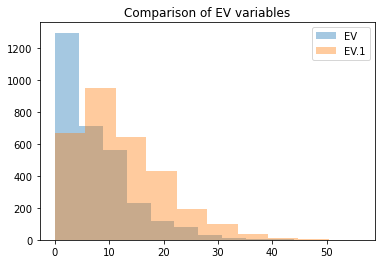

In [39]:
plt.hist(df['EV'], alpha = 0.4, label='EV')
plt.hist(df['EV.1'], alpha = 0.4, label='EV.1')
plt.legend()
plt.title("Comparison of EV variables")
plt.show()

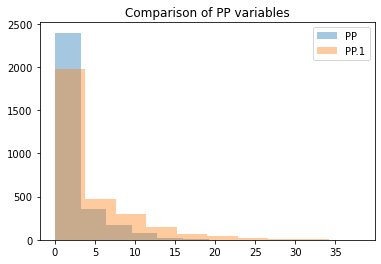

In [40]:
plt.hist(df['PP'], alpha = 0.4, label='PP')
plt.hist(df['PP.1'], alpha = 0.4, label='PP.1')
plt.legend()
plt.title("Comparison of PP variables")
plt.show()

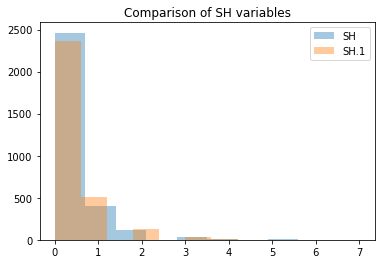

In [41]:
plt.hist(df['SH'], alpha = 0.4, label='SH')
plt.hist(df['SH.1'], alpha = 0.4, label='SH.1')
plt.legend()
plt.title("Comparison of SH variables")
plt.show()

After analyzing these seemingly duplicate variables, they don't seem to contain identical data although they are probably measuring the same thing. We need further analysis to determine whether to remove or keep them.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rk             3040 non-null   int64  
 1   Player         3040 non-null   object 
 2   Age            3040 non-null   float64
 3   Tm             3040 non-null   object 
 4   Pos            3040 non-null   object 
 5   GP             3040 non-null   int64  
 6   G              3040 non-null   int64  
 7   A              3040 non-null   int64  
 8   PTS            3040 non-null   int64  
 9   +/-            3040 non-null   int64  
 10  PIM            3040 non-null   int64  
 11  PS             3040 non-null   float64
 12  EV             3040 non-null   int64  
 13  PP             3040 non-null   int64  
 14  SH             3040 non-null   int64  
 15  GW             3040 non-null   int64  
 16  EV.1           3040 non-null   int64  
 17  PP.1           3040 non-null   int64  
 18  SH.1    

In [56]:
df.isnull().sum()

Rk               0
Player           0
Age              0
Tm               0
Pos              0
GP               0
G                0
A                0
PTS              0
+/-              0
PIM              0
PS               0
EV               0
PP               0
SH               0
GW               0
EV.1             0
PP.1             0
SH.1             0
S                0
S%               0
TOI              0
ATOI             0
BLK              0
HIT              0
FOW              0
FOL              0
FO%              0
Contract Type    0
NHL Clause       0
Term             0
Total Value      0
AAV              0
Year             0
Month            0
dtype: int64

# Exporting Combined Data

In [57]:
df.to_csv('Combined_data_non_null.csv', index=False)